<a href="https://colab.research.google.com/github/andrfr21/Churn_prediction/blob/main/Lab4_2025_Pytorch_Correction(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Pytorch

## Table of content

[1. Pytorch basics](#basics)<br>
- [1.1 Pytorch tutorials](#tutorials)<br>
- [1.2 Neural Network in Pytorch](#NNPytorch)<br>


[2. Simple Example for handling images](#SimpleExampleImage)<br>
- [2.1  Loading MNIST dataset ](#LoadMNIST)<br>
- [2.2  Normalization  ](#Normalization)<br>
- [2.3  Train a Neural Network in Pytorch ](#TrainNNPytorch)<br>
- [2.4  Train more classical ML algorithms](#ML)<br>

[Bonus 1. Backpropagation](#B1)<br>

[Bonus 2. NN Playground](#B2)<br>








**Import the following libraries and check that Pytorch is running on your computer.**

In [1]:
from __future__ import print_function
from __future__ import division

import os
import time

import numpy as np
import pandas
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [2]:

print('\n\n(If this cell runs for more than 30 seconds, stop it and rerun it.) \n\n')


import requests
exec(requests.get("https://raw.githubusercontent.com/claireBoyer/tutorial-conformal-prediction/main/labs/aux-npt/get-send-code.html").content)


# Replace 'TO_UPDATE' with the appropriate session information
npt_config = {'session_name': 'Lab4-52445',}


# Prompt for the sender's name
npt_config['sender_name'] = input("Enter your name: \n -->")
npt_config['session_owner'] = input("\n \n Your teacher: depending on your teacher, enter either \n - ataylor \n - pbianchi \n - dthomsen \n - bgoujaud \n-->") #

print('\n \n You should get as an output <Response [200]> below. If not, you probably have a typo in the teacher name, retry :)')

send('started', 0)




(If this cell runs for more than 30 seconds, stop it and rerun it.) 


Enter your name: 
 -->test

 
 Your teacher: depending on your teacher, enter either 
 - ataylor 
 - pbianchi 
 - dthomsen 
 - bgoujaud 
-->bgoujaud

 
 You should get as an output <Response [200]> below. If not, you probably have a typo in the teacher name, retry :)


<Response [400]>

<a id='basics'></a>
# 1 - Pytorch basics



<a id='tutorials'></a>

## 1.1 - Pytorch tutorials

Look at the following two tutorials:
- How to write tensor operations:

    https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- A list of functions that are available in PyTorch:

    https://pytorch.org/docs/stable/torch.html
- How to define and train a neural network in PyTorch

    https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
- More information on neural networks with PyTorch can be found here

    https://pytorch.org/docs/stable/nn.html

<a id='NNPytorch'></a>

## 1.2 - Neural Network in Pytorch

Here is an example of a simple neural network architecture in Python

In [3]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

**1) What does the dim  argument in Softmax correspond to?**

In [4]:
# Consider the following tensor
u = torch.randn(2,3)
print("This is a tensor", '\n', u,'\n' )

outputdim1 = nn.Softmax(dim=1)(u)
print("This is the output of the softmax operation with dim=1", '\n', outputdim1,'\n' )

outputdim0 = nn.Softmax(dim=0)(u)
print("This is the output of the operation with dim=0", '\n', outputdim0,'\n' )


This is a tensor 
 tensor([[ 1.8391, -1.4189,  1.0314],
        [ 0.4082,  0.1073,  1.4636]]) 

This is the output of the softmax operation with dim=1 
 tensor([[0.6737, 0.0259, 0.3004],
        [0.2168, 0.1604, 0.6228]]) 

This is the output of the operation with dim=0 
 tensor([[0.8070, 0.1785, 0.3936],
        [0.1930, 0.8215, 0.6064]]) 



**Hence: how do you interpret the dim argument?**
    

#
#
# YOUR CODE HERE
#
#


**2) What is the shape of this neural network? What is the shape of the inputs, outputs? What are the activation functions? What is the total number of trainaible parameters?**

In [5]:
# Create the network
model1 = Network()


Answer here:


#
#
# YOUR CODE HERE
#
#


**3) What is the total size (in MB) of this Neural Network ? You may want to use the torchsummary package. Check also that the number of trainable parameters match the one you computed.**

In [6]:
from torchsummary import summary

summary(model1, (1, 784))

total_size = 0.77
send('The total estimated size of this neural network is {} [MB]'.format(total_size), 1)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]         200,960
           Sigmoid-2               [-1, 1, 256]               0
            Linear-3                [-1, 1, 10]           2,570
           Softmax-4                [-1, 1, 10]               0
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.78
Estimated Total Size (MB): 0.78
----------------------------------------------------------------


<Response [400]>

**4) How can we access the network weigths? the biases? What are their types?**


In [7]:
print("The weights of the networks are Torch tensors: ", torch.is_tensor(model1.hidden.weight))
print("The biases of the networks are Torch tensors: ", torch.is_tensor(model1.hidden.bias))

weights_hidden_layer = model1.hidden.weight
bias_hidden_layer = model1.hidden.bias
shape_weights_hidden = model1.hidden.weight.shape
shape_bias_hidden = model1.hidden.bias.shape

weights_output_layer = model1.output.weight
bias_output_layer = model1.output.bias
shape_weights_output = model1.output.weight.shape
shape_bias_output = model1.output.bias.shape

print("The shape of the weights (hidden layer) is: ", shape_weights_hidden)
print("The shape of the biais (hidden layer) is: ", shape_bias_hidden)


The weights of the networks are Torch tensors:  True
The biases of the networks are Torch tensors:  True
The shape of the weights (hidden layer) is:  torch.Size([256, 784])
The shape of the biais (hidden layer) is:  torch.Size([256])


**5) Another way of creating neural network in Pytorch is by using the module nn.Sequential, see https://pytorch.org/docs/master/nn.html#torch.nn.Sequential**

**Looking at this documentation, create the same neural network as above.**

In [8]:
# Hyperparameters for our network (same as before, using nn.Sequential)
input_size = 784
hidden_sizes = 256
output_size = 10

# Build the same feed-forward network using nn.Sequential :
model2 = nn.Sequential(
    nn.Linear(input_size, hidden_sizes),
    nn.Sigmoid(),
    nn.Linear(hidden_sizes, output_size),
    nn.Softmax(dim=1)
)

print(model2)
send(np.array([input_size, hidden_sizes, output_size], dtype=object), 2)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=10, bias=True)
  (3): Softmax(dim=1)
)


<Response [400]>

**6) Which approach do you recommend: the Sequential one or the one built on the Network class ?**




#
#
# YOUR CODE HERE
#
#



**7) When and how are the weights initialized? You may look into
https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py#L70-L73**




#
#
# YOUR CODE HERE
#
#



<a id='SimpleExampleImage'></a>

# 2 - Simple Example for handling images

For now, we did not train a neural network, i.e. we did not use a data set to learn the parameters of the network. In fact, we did not work with data. Let us change that. We are going to work with the famous MNIST data set.

<a id='LoadMNIST'></a>
## 2.1 - Loading the dataset

TorchVision (https://pytorch.org/docs/stable/torchvision/index.html) package contains a lot of dataset which are easily accessible via

In [9]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 41.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 11.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.50MB/s]


You can find additionnal information on functions inherited from the torchvision.datasets class here :

https://pytorch.org/vision/stable/index.html

**8) Using the function $\texttt{imshow}$ from $\texttt{matplotlib.pyplot}$, plot some images of the dataset MNIST. What is the shape of a MNIST image?**

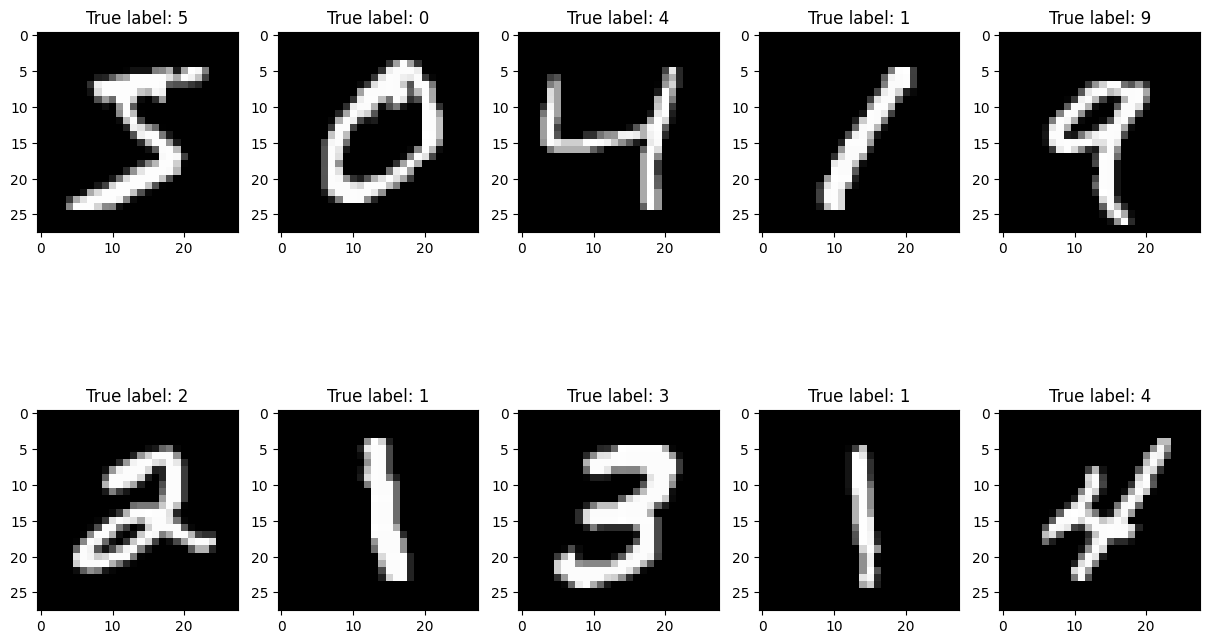

MNIST images are of shapes (28, 28) which leads to 784 dimensions (pixels)


In [10]:

#Load the image number i and print its true label

plt.figure(figsize=(15, 9))
for i in range(10):
    plt.subplot(2,5,i+1)
    image, label = trainset[i]
    plt.imshow(image, cmap='gray')
    image_true_label = label
    plt.title("True label: {}".format(image_true_label))

send(plt, 3)
plt.show()

# What are the shapes and the sizes of the images?
im_shape = (28, 28)
total_pixels = 28 * 28

print("MNIST images are of shapes {} which leads to {} dimensions (pixels)".format(im_shape, total_pixels))


<a id='Normalization'></a>
## 2.2 - Normalization

Data set should be **normalized** to avoid numerical instability.
Indeed, working with big floats can lead to important numerical errors.
It is a good practice to normalize the inputs (features) so that they have zero mean and a constant (small) variance. To convince yourself of the damages that can result from numerical instability, see the following cell:

In [11]:
foo = 1e9
for i in range(int(1e6)):
    foo += 1e-6
foo -= 1e9
print("Numerically instable sum: %f " % foo)

bar = 1
for i in range(int(1e6)):
    bar += 1e-6
bar -= 1
print("Numerically stable sum: %f " % bar)

Numerically instable sum: 0.953674 
Numerically stable sum: 1.000000 


**9) What conclusion can you draw from the above code?**

a) mathematically speaking, what should be the values of 'foo' and 'bar'?


#
#
# YOUR CODE HERE
#
#


b) What do you conclude? Is this observation valid only for large numbers? (you can try the next cell)


#
#
# YOUR CODE HERE
#
#


In [12]:
float_accuracy = np.finfo(float).eps
foo = 1 + float_accuracy/2 - 1
print('1+epsilon-1 = epsilon. Using floating-point arithmetics, however... the result depends on the value of epsilon.')
print('in particular, 1+epsilon-1 outputs ', foo, ' when epsilon=',float_accuracy/2)

1+epsilon-1 = epsilon. Using floating-point arithmetics, however... the result depends on the value of epsilon.
in particular, 1+epsilon-1 outputs  0.0  when epsilon= 1.1102230246251565e-16


In [13]:
send('What do you conclude? your comment here', 4)

<Response [400]>

In [14]:
# For normalization, compute mean and std of the data
avg = 0
for i in range(len(trainset)):
    avg = avg + np.mean(trainset[i][0])
avg = avg/len(trainset)

var = 0
for i in range(len(trainset)):
    var = var + np.mean((trainset[i][0]-avg)**2)
var = var/len(trainset)

[avg, np.sqrt(var)]

[np.float64(33.318421449829934), np.float64(78.56748998339792)]

Now, we need to load the dataset and renormalize the data. Additionnally, PyTorch works with tensors, as you have seen in the tutorial. Thus, we need to transform the data into tensors. The following code does this operation.  

In [15]:
from torchvision import transforms

# Define a transform to normalize the data:
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean = 0.1307, std = 0.3081) ])

# Download (it should have been done earlier, normally) and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 10000)



**10) Describe the normalization we have implemented. More information on preprocessing data can be found here https://pytorch.org/vision/stable/transforms.html** **What is the training batch size? What is the testing batch size? How many iterations does one epoch contain?**


#
#
# YOUR CODE HERE
#
#


In [16]:
send('The batch size for training has size ???', 5)

send('The batch size for testing has size ???, because ???', 6)

<Response [400]>

The MNIST data set is now loaded and ready to be used to train a neural network.

<a id='TrainNNPytorch'></a>
## 2.3 - Train a Neural Network in Pytorch

**11) Create a neural network of your choice by creating the ReluNetwork class below by filling in the code below. Store the model into an object $\texttt{model}$. You will also have to define a loss, that you can store in an object called $\texttt{criterion}$ and an optimizer, stored in an object called $\texttt{optimizer}$.**

If you are looking for a function in nn, it is probably here:

https://pytorch.org/docs/stable/nn

If you are looking for an optimizer, the answer may be there:

https://pytorch.org/docs/stable/optim.html

**Describe your choice here:**


#
#
# YOUR CODE HERE
#
#


In [17]:
# Goal: Define the network architecture as a new nn.Module subclass

class ReluNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)

        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

        # Define Relu activation and log softmax output
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)


    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.logsoftmax(x)

        return x

# Instantiate the model
model = ReluNetwork()

send(ReluNetwork, 7)
send(str(model), 8)

# Define the loss
criterion = nn.NLLLoss()

send(str(criterion), 9)

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

send(str(optimizer), 10)


<Response [400]>

#### Explanations on autodiff

```torch.Tensor``` is the central class of the package. If you set its attribute ```.requires_grad``` as True, it starts to track all operations on it. When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ```.grad``` attribute.

**12) Train the network you have created during a small number of epochs (typically 5). Compute the training loss, training accuracy, test loss, test accuracy for each epoch.
To define a training, we need a model, a criterion (or loss), and an optimizer.
In the following, in order to modify the latest easily in several experiment, we will redefine it automatically inside the training procedure.**

In [18]:
# GOAL: train the network with your optimizer over 5 epochs

start_time = time.time()
epochs = 5


for e in range(epochs):
    running_loss = 0
    running_test_loss=0

    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad() # Reset gradients to zero before each batch

        output = model(images)
        loss = criterion(output, labels)

        # Backpropagate and perform one optimization step
        loss.backward()
        optimizer.step()


        running_loss += loss.item()

    #Compute validation loss
    with torch.no_grad():
        for images, labels in testloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            outputs = model(images)
            test_loss = criterion(outputs, labels)
            running_test_loss += test_loss.item()

            predictions = torch.argmax(outputs, 1)
            correct_test = predictions.eq(labels).sum().item()

            test_accuracy = correct_test / len(labels)

        print("Epoch number", e+1)
        print("Training loss: ", round(running_loss/len(trainloader),3))
        print("Test loss: ", round(running_test_loss/len(testloader),3))
        print("Test Accuracy: ", test_accuracy)

print("--- %s seconds ---" % round((time.time() - start_time), 3))
send(np.array([round(running_loss/len(trainloader),3), round(running_test_loss/len(testloader),3), test_accuracy]), 11)


Epoch number 1
Training loss:  0.267
Test loss:  0.131
Test Accuracy:  0.9605
Epoch number 2
Training loss:  0.108
Test loss:  0.095
Test Accuracy:  0.9717
Epoch number 3
Training loss:  0.074
Test loss:  0.083
Test Accuracy:  0.9752
Epoch number 4
Training loss:  0.054
Test loss:  0.072
Test Accuracy:  0.9784
Epoch number 5
Training loss:  0.041
Test loss:  0.067
Test Accuracy:  0.9801
--- 91.611 seconds ---


<Response [400]>

**13) More generally, define a training *function* that returns three lists containing respectively the training loss, the test loss, and the criterion value at the end of each epoch.**

In [19]:
##############
# Goal: Define a training **function** that returns the training loss,
# the test loss, and the criterion at the end of each epoch

def training(model,
             criterion=nn.NLLLoss(),
             optim_alg="SGD",
             lr=0.01,
             momentum=(.9, .999),
             schedule=False,
             nb_epochs=5,
             intermediate_prints=False,
            ):

    if optim_alg == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum[0])
    elif optim_alg == "ADAM":
        optimizer = optim.Adam(model.parameters(), lr=lr, betas=momentum)
    else:
        raise ValueError("optim_alg must take its value in {}".format(["SGD", "ADAM"]))

    if schedule:
        scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=1)

    epoch_train_losses_list = []
    epoch_test_losses_list = []
    epoch_accuracy_list = []

    for e in range(nb_epochs):
        running_loss = 0
        running_test_loss=0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        #Compute validation loss
        with torch.no_grad():
            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)

                outputs = model(images)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                predictions = torch.argmax(outputs, 1)
                correct_test = predictions.eq(labels).sum().item()
                test_accuracy = correct_test / len(labels)

        final_train_loss = running_loss/len(trainloader)
        final_test_loss = running_test_loss/len(testloader)

        if intermediate_prints:
            print("Epoch number: {}".format(e+1))
            print("Training loss = {} ".format(round(final_train_loss,3)))
            print("Test loss = {} ".format(round(final_test_loss,3)))
            print("Test Accuracy = {} ".format(test_accuracy))

        epoch_train_losses_list.append(final_train_loss)
        epoch_test_losses_list.append(final_test_loss)
        epoch_accuracy_list.append(test_accuracy)

        if schedule:
            scheduler.step(final_test_loss)

    return epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list

###############


You should now be able to run the cell below, in order to train the neural network with a different optimizer.

In [20]:
# Goal: run a training with the optimization algorithm of your choice

start_time = time.time()
nb_epochs = 10
# Training of the model
epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list = training(
    model,
    criterion=nn.NLLLoss(),
    optim_alg="SGD",
    lr=0.01,
    momentum=(0., ),
    schedule=False,
    nb_epochs=nb_epochs,
    intermediate_prints=True,
)

send(
    np.array([
        round(epoch_train_losses_list[-1], 3),
        round(epoch_test_losses_list[-1], 3), 100*epoch_accuracy_list[-1]
    ]), 9)

print("--- %s seconds ---" % round((time.time() - start_time), 3))

Epoch number: 1
Training loss = 0.026 
Test loss = 0.061 
Test Accuracy = 0.9804 
Epoch number: 2
Training loss = 0.023 
Test loss = 0.06 
Test Accuracy = 0.981 
Epoch number: 3
Training loss = 0.022 
Test loss = 0.06 
Test Accuracy = 0.9807 
Epoch number: 4
Training loss = 0.021 
Test loss = 0.06 
Test Accuracy = 0.9813 
Epoch number: 5
Training loss = 0.02 
Test loss = 0.06 
Test Accuracy = 0.9811 
Epoch number: 6
Training loss = 0.02 
Test loss = 0.06 
Test Accuracy = 0.9816 
Epoch number: 7
Training loss = 0.019 
Test loss = 0.06 
Test Accuracy = 0.9815 
Epoch number: 8
Training loss = 0.019 
Test loss = 0.06 
Test Accuracy = 0.9817 
Epoch number: 9
Training loss = 0.018 
Test loss = 0.06 
Test Accuracy = 0.9817 
Epoch number: 10
Training loss = 0.018 
Test loss = 0.059 
Test Accuracy = 0.9818 
--- 187.427 seconds ---


Let's visualize the predictions of the model for some random test images: for a minibatch of size 10 of test images, the following code prints the image, its label, the corresponding prediction given by the network, and the network accuracy on the minibatch.

**14) Can you find incorrect predictions? Can you make sense of them and/or interpret the output?**

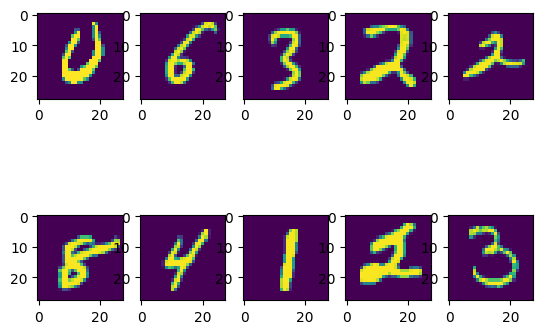

Predictions are tensor([0, 6, 3, 2, 2, 8, 4, 1, 2, 3])
True labels are tensor([0, 6, 3, 2, 2, 8, 4, 1, 2, 3])
test accuracy on this minibatch of size 10 is 100 % 


In [21]:
test_batch_size = 10
minitestloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)
running_loss = 0
running_test_loss = 0
u = 0

for images, labels in minitestloader:
    if u < 1:

        for i in range(test_batch_size):
            plt.subplot(2, int(test_batch_size / 2), i + 1)
            plt.imshow(images[i][0])
        send(plt, 12)
        plt.show()

        images = images.view(images.shape[0], -1)
        outputs = model(images)
        test_loss = criterion(outputs, labels)
        running_test_loss += test_loss.item()

        predictions = torch.argmax(outputs, 1)
        print('Predictions are', predictions)
        print('True labels are', labels)
        correct_test = predictions.eq(labels).sum().item()

        print('test accuracy on this minibatch of size %d is %.0f %% ' %
              (test_batch_size, 100 * correct_test / test_batch_size))
        send('test accuracy on this minibatch of size %d is %.0f %% ' %
              (test_batch_size, 100 * correct_test / test_batch_size),18)

        test_accuracy = 100 * correct_test / len(predictions)
        u = u + 1


#
#
# YOUR CODE HERE
#
#


## Analyzing the performance of the optimizer for the training

The cell below plots the training and test error as a function of the number of epochs.

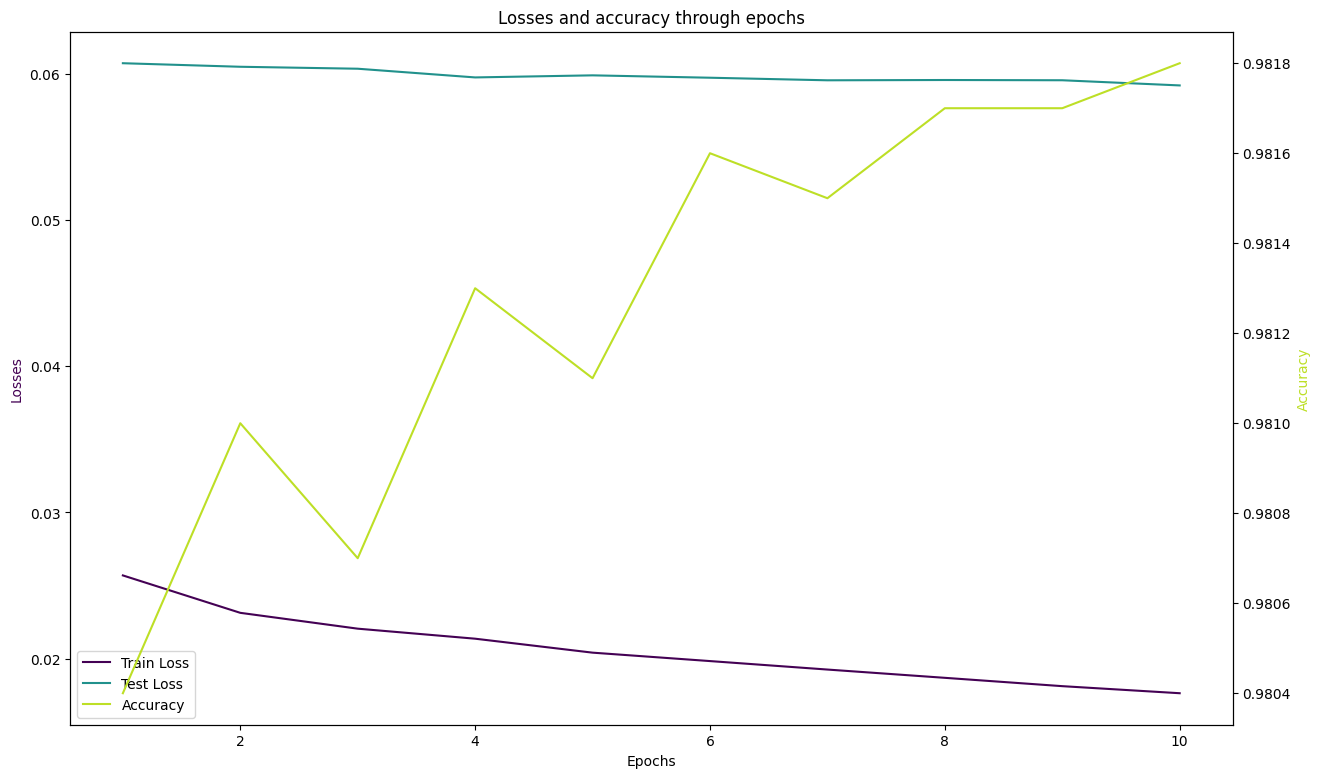

In [22]:
# Plot losses and accuracy curves of the first training through time

fig = plt.figure(figsize=(15, 9))
host = fig.add_subplot(111)
secondary = host.twinx()

host.set_xlabel("Epochs")
host.set_ylabel("Losses")
secondary.set_ylabel("Accuracy")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(np.arange(nb_epochs)+1, epoch_train_losses_list, color=color1, label="Train Loss")
p2, = host.plot(np.arange(nb_epochs)+1, epoch_test_losses_list, color=color2, label="Test Loss")
p3, = secondary.plot(np.arange(nb_epochs)+1, epoch_accuracy_list, color=color3, label="Accuracy")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
secondary.yaxis.label.set_color(p3.get_color())

plt.title("Losses and accuracy through epochs")

send(plt, 13)

plt.show()

As expected, we see a training error which decreases with the number of epochs. However, there is no overfitting since the test loss is also decreasing. We could add a few more epochs to the training procedure to see if the network performance can be improved. The code below compares several optimizers.

**15) Based on the code below, which optimizer is the best on this task?**

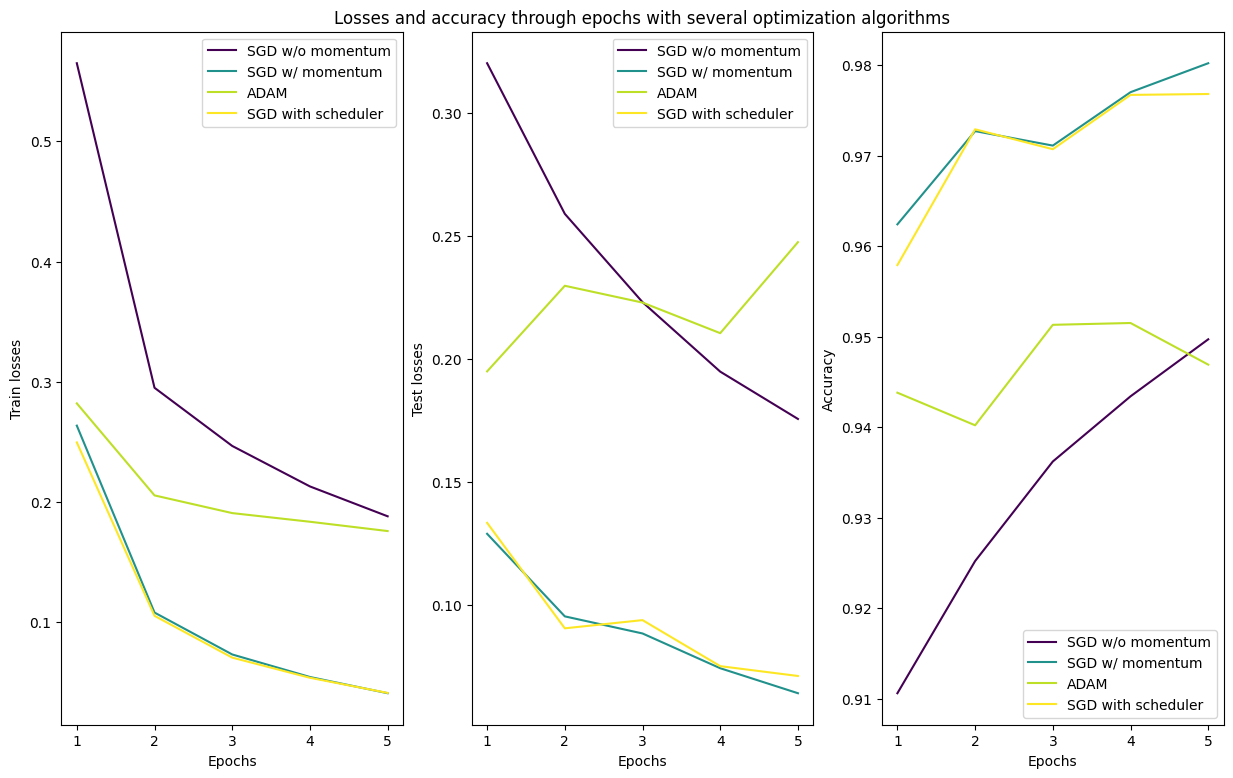

--- 377.46 seconds ---


In [23]:
# Compare several optimization algorithms performance

start_time = time.time()

# Training the same architecture with different losses
nb_epochs = 5

# SGD w/o momentum
epoch_train_losses_list1, epoch_test_losses_list1, epoch_accuracy_list1 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD w/ momentum
epoch_train_losses_list2, epoch_test_losses_list2, epoch_accuracy_list2 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# ADAM
epoch_train_losses_list3, epoch_test_losses_list3, epoch_accuracy_list3 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="ADAM",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9, 0.999),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD with scheduler
epoch_train_losses_list4, epoch_test_losses_list4, epoch_accuracy_list4 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.1,
                                                                                   momentum=(0.,),
                                                                                   schedule=True,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# Plot curves
fig = plt.figure(figsize=(15, 9))

plt.subplot(1,3,1)
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Train losses")

plt.subplot(1,3,2)
plt.title("Losses and accuracy through epochs with several optimization algorithms")
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Test losses")

plt.subplot(1,3,3)
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

send(plt, 14)

plt.show()

print("--- %s seconds ---" % round((time.time() - start_time), 3))

In [24]:
# Please leave your feeling about those algorithms
myfavorite = "ADAM"
send("I prefer {} ".format(myfavorite), 15)


<Response [400]>

<a id='ML'></a>
## 2.4 - Train more classical ML algorithms

**16) Implement a random forest and compute its accuracy on the MNIST test set. Compare with Neural Networks.**

In [25]:
# Reload the training data
tfm = transforms.ToTensor()
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=tfm)
testset  = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=tfm)

x0, _ = trainset[0]                 # x0: torch.Tensor of shape (1, 28, 28)
input_size = x0.numel()             # 784
train_size = len(trainset)
test_size  = len(testset)

# Preallocate numpy arrays (because sklearn uses numpy arrays)
X_train = np.zeros((train_size, input_size), dtype=np.float32)
y_train = np.zeros(train_size, dtype=np.int64)

X_test  = np.zeros((test_size, input_size), dtype=np.float32)
y_test  = np.zeros(test_size, dtype=np.int64)

# Fill arrays (flatten in torch, convert once)
for i in range(train_size):
    x, y = trainset[i]
    X_train[i] = x.view(-1).numpy()
    y_train[i] = int(y)

for i in range(test_size):
    x, y = testset[i]
    X_test[i] = x.view(-1).numpy()
    y_test[i] = int(y)

# Classical ML method
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
accuracy_rf = clf.score(X_test, y_test)

print("Random forest accuracy is %.3f" % accuracy_rf)

send("Random forest accuracy is %.1f %%" % (100 * accuracy_rf), 16)


Random forest accuracy is 0.970


<Response [400]>

In [26]:
# Test other methods
#
#
# YOUR CODE HERE
#
#

<a id='B1'></a>
## BONUS 1 - Backpropagation

The following function prints a few elements that can help understand what happens when using ```loss.backward()``` and ```optimizer.step()```


In [27]:
epochs = 1
u=0

for images, labels in trainloader:
    # Flatten MNIST images into a 784 long vector
    while u <2:
        print('\n Minibatch number', u,'\n')
        images = images.view(images.shape[0], -1)
        print('image shape is', images.shape)
        # Training pass

        optimizer.zero_grad()


        output = model(images)
        print('the output probabilities  for the first 2 images are', '\n', torch.exp(output[0:2, :]),2)
        print('the labels  for the first 2 images are', labels[0:2],'\n' )

        loss = criterion(output, labels)

        print('a few coefs of the model parameters are \n',  next(model.parameters())[0:3, 0:3],'\n')
        print('before backward step, the gradient of the loss wrt these few coefs of the model parameters have type ', type(next(model.parameters()).grad),'\n')

        loss.backward()
        print('after backward step, the gradient of the loss wrt these few coefs of the model parameters have type ', type(next(model.parameters()).grad),'\n')
        print('after backward step, the gradient of the loss wrt these few coefs of the model parameters are\n', next(model.parameters()).grad[0:3,0:3],'\n')
        optimizer.step()
        print('after optimizer step, these coefs of the model parameters are\n', next(model.parameters())[0:3,0:3],'\n')
        running_loss += loss.item()
        u = u+1


 Minibatch number 0 

image shape is torch.Size([64, 784])
the output probabilities  for the first 2 images are 
 tensor([[4.2006e-07, 2.5968e-07, 5.2978e-08, 1.1686e-06, 7.5831e-05, 1.0235e-05,
         9.5639e-11, 2.1797e-04, 8.9646e-07, 9.9969e-01],
        [1.8522e-05, 1.6251e-03, 1.0645e-04, 6.1307e-06, 2.0525e-07, 5.5943e-05,
         3.5301e-04, 1.1793e-06, 9.9783e-01, 1.4079e-06]],
       grad_fn=<ExpBackward0>) 2
the labels  for the first 2 images are tensor([9, 8]) 

a few coefs of the model parameters are 
 tensor([[-0.0285, -0.0330,  0.0120],
        [ 0.0003,  0.0342,  0.0331],
        [ 0.0180,  0.0220, -0.0024]], grad_fn=<SliceBackward0>) 

before backward step, the gradient of the loss wrt these few coefs of the model parameters have type  <class 'NoneType'> 

after backward step, the gradient of the loss wrt these few coefs of the model parameters have type  <class 'torch.Tensor'> 

after backward step, the gradient of the loss wrt these few coefs of the model paramet

<a id='B2'></a>
## Bonus 2 - playing with neural network parameters

You can find an helpful lab done by Google here:
https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises?hl=fr.
In this lab, you will do tasks that help to understand the key role of each component of a neural network (activation function, regularization, number of hidden layers ...)

This lab is based on the "Neural Network Playground" implemented by TensorFlow. It is a very insightful tool that allows playing with a small and customizable network.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.29268&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false